In [13]:
import requests
import pandas as pd
import numpy as np

In [28]:
# Fetch the data using url
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json = r.json()

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [42]:
# This script shows the first players in list and assesses the position from number to word, 1 = goalkeeper, 2 = defender, 3 = midfielder and 4 = forward
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

slim_elements_df = slim_elements_df.copy()

slim_elements_df['position'] = slim_elements_df['element_type'].map(elements_types_df.set_index('id').singular_name)

slim_elements_df['team'] = slim_elements_df['team'].map(teams_df.set_index('id').name)
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,3,0.6,68,0,3350,0.0,0,Midfielder
1,Papastathopoulos,Arsenal,2,0.1,49,0,10225,0.0,0,Defender
2,Luiz Moreira Marinho,Arsenal,2,0.8,55,364,36845,1.3,7,Defender
3,Aubameyang,Arsenal,3,9.9,115,896,460202,3.0,35,Midfielder
4,Soares,Arsenal,2,0.2,47,0,3271,0.0,0,Defender


In [43]:
# My own current team
team_id = 7164348
url = f'https://fantasy.premierleague.com/api/element-summary/{team_id}/'
r = requests.get(url)

dict_keys(['detail'])


In [44]:
# Show top performing players
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df.sort_values('value',ascending=False).head(3)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
132,Zouma,Chelsea,2,21.2,56,810,1664612,10.5,59,Defender,10.5
549,Fabianski,West Ham,1,4.4,51,900,259317,10.4,53,Goalkeeper,10.4
426,Wilson,Newcastle,4,13.3,65,787,1652247,10.3,67,Forward,10.3


In [45]:
# Show which position provides most value. Value is calculated using price and total points.
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
1,Forward,2.506579
3,Midfielder,2.457500
0,Defender,2.425571
2,Goalkeeper,2.126471


In [46]:
# Remove players with 0 value and show the average value again. It seems that at the moment of creating this script, goalkeepers provide most value to the team.
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)


,position,value
2,Goalkeeper,5.355556
0,Defender,3.477778
1,Forward,3.284483
3,Midfielder,3.188108


In [48]:
# which teams are providing the most value this year
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)


,team,value
1,Aston Villa,4.705556
8,Leeds,4.589474
15,Southampton,4.580000
18,West Ham,4.404762
19,Wolves,4.260000
4,Chelsea,4.072727
16,Spurs,3.695455
2,Brighton,3.485714
13,Newcastle,3.442857
5,Crystal Palace,3.365000


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
549,Fabianski,NaN,1,4.4,51,900,259317,10.4,53,Goalkeeper,10.4
294,Meslier,NaN,1,4.6,46,900,360256,9.3,43,Goalkeeper,9.3
528,Johnstone,NaN,1,1.8,45,900,125789,9.1,41,Goalkeeper,9.1
460,McCarthy,NaN,1,21.9,46,900,799509,9.1,42,Goalkeeper,9.1
33,Martínez,NaN,1,25.1,48,810,1877780,8.8,42,Goalkeeper,8.8
403,Darlow,NaN,1,1.7,50,900,172002,8.8,44,Goalkeeper,8.8
485,Lloris,NaN,1,5.8,55,900,282643,8.5,47,Goalkeeper,8.5
7,Leno,NaN,1,8.6,50,900,402663,8.0,40,Goalkeeper,8.0
575,dos Santos Patrício,NaN,1,7.1,55,900,312516,8.0,44,Goalkeeper,8.0
112,Pope,NaN,1,9.3,54,810,160504,7.8,42,Goalkeeper,7.8


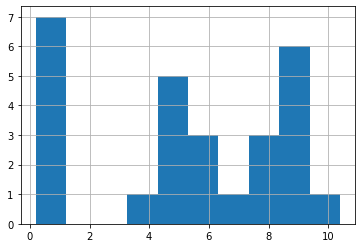

In [35]:
# This shows the best players by value in Premier League and plots the data.
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

#First show and plot goalkeepers
goal_df.value.hist()
goal_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
132,Zouma,NaN,2,21.2,56,810,1664612,10.5,59,Defender,10.5
52,Konsa Ngoyo,NaN,2,8.7,47,810,862368,9.4,44,Defender,9.4
553,Cresswell,NaN,2,11.0,52,900,906694,9.0,47,Defender,9.0
144,James,NaN,2,15.8,52,723,1470744,9.0,47,Defender,9.0
146,Chilwell,NaN,2,35.9,62,621,2795183,9.0,56,Defender,9.0
466,Vestergaard,NaN,2,10.9,48,765,847121,9.0,43,Defender,9.0
27,Magalhães,NaN,2,11.6,51,810,946333,8.8,45,Defender,8.8
472,Bednarek,NaN,2,3.1,45,810,148323,8.7,39,Defender,8.7
281,Dallas,NaN,2,6.6,45,890,449115,8.4,38,Defender,8.4
47,Mings,NaN,2,11.9,53,810,1051600,8.3,44,Defender,8.3


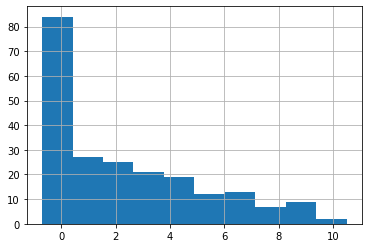

In [8]:
# Now defenders
def_df.value.hist()
def_df.sort_values('value',ascending=False).head(10)


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
43,Grealish,NaN,3,37.5,77,810,3091290,9.2,71,Midfielder,9.2
492,Son,NaN,3,57.1,95,820,4787079,9.2,87,Midfielder,9.2
467,Ward-Prowse,NaN,3,12.1,61,900,995235,9.2,56,Midfielder,9.2
592,Lomba Neto,NaN,3,3.9,56,756,376898,9.1,51,Midfielder,9.1
563,Bowen,NaN,3,2.3,63,829,257744,8.3,52,Midfielder,8.3
279,Klich,NaN,3,5.5,55,876,777727,7.6,42,Midfielder,7.6
567,Fornals,NaN,3,2.0,65,825,234520,7.5,49,Midfielder,7.5
74,March,NaN,3,1.3,50,750,179642,7.4,37,Midfielder,7.4
129,Frello Filho,NaN,3,7.1,50,455,1215867,7.4,37,Midfielder,7.4
587,Castelo Podence,NaN,3,3.2,54,653,683092,7.4,40,Midfielder,7.4


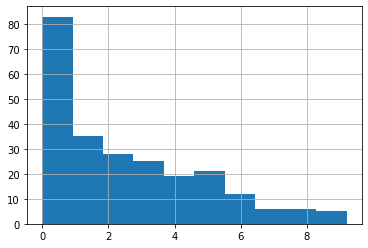

In [9]:
# Midfielders
mid_df.value.hist()
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
426,Wilson,NaN,4,13.3,65,787,1652247,10.3,67,Forward,10.3
283,Bamford,NaN,4,34.9,61,850,3161813,10.2,62,Forward,10.2
197,Calvert-Lewin,NaN,4,62.2,80,963,4434023,9.8,78,Forward,9.8
473,Adams,NaN,4,7.6,60,855,627625,8.3,50,Forward,8.3
61,Watkins,NaN,4,8.1,61,810,1003888,8.0,49,Forward,8.0
490,Kane,NaN,4,39.4,109,893,2827825,7.9,86,Forward,7.9
253,Vardy,NaN,4,30.3,103,738,2218164,6.4,66,Forward,6.4
77,Maupay,NaN,4,2.5,62,733,608644,6.3,39,Forward,6.3
463,Ings,NaN,4,5.5,83,624,710010,5.7,47,Forward,5.7
225,Mitrović,NaN,4,5.3,56,692,486479,5.4,30,Forward,5.4


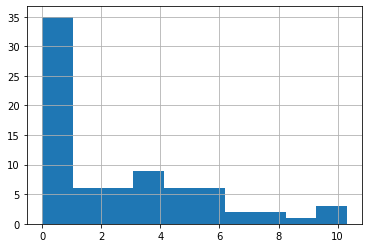

In [10]:
# And lastly forwards
fwd_df.value.hist()
fwd_df.sort_values('value',ascending=False).head(10)

In [6]:
# Download the data
slim_elements_df.to_csv(r'<your folder')